In [1]:
import pandas as pd
import seaborn as sn

In [2]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data1=data.rename({'Delivery Time':'Delivery_Time'}, axis=1)
data1.head()

,Delivery_Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data2=data1.rename({'Sorting Time':'Sorting_Time'}, axis=1)
data2.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 400.0 bytes


In [9]:
data2.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

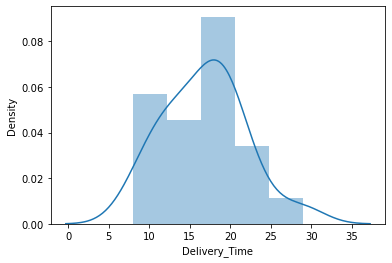

In [11]:
import seaborn as sns
sns.distplot(data2['Delivery_Time'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

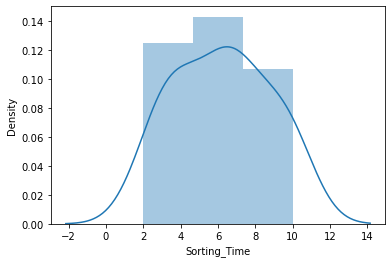

In [12]:
import seaborn as sns
sns.distplot(data2['Sorting_Time'])

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = data2).fit()

In [14]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

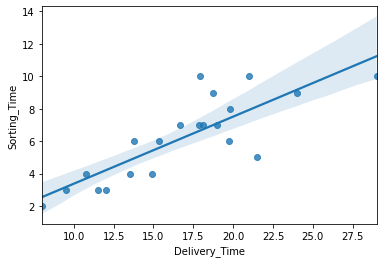

In [17]:
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data2);

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [20]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [21]:
#Predict for 200 and 300 Sorting_Time circulation
newdata=pd.Series([5,6])
newdata

0    5
1    6
dtype: int64

In [22]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,6


In [23]:
model.predict(data_pred)

0    14.827833
1    16.476853
dtype: float64

In [24]:
x=model.predict(data_pred)
x

0    14.827833
1    16.476853
dtype: float64

In [25]:
y=data.iloc[:,1]-x
y

0     -4.827833
1    -12.476853
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
dtype: float64